In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## PDF and CDF - Simple
For this section, I started with a basic probability distribution function $ y = Ax $, where A is the normalization constant.
Normalizing from 0 to 1, 

$$ \int_{0}^{1} Ax dx = 1$$
$$A\frac{x^2}{2} = 1$$
Evaluating from x = 0 to x = 1, 
$$A = 2$$
which, applying this normalization factor to the PDF now makes the function $y = 2x$ and the cumulative distribution function is therefore 
$$\int_{0}^{1} 2x = x^2$$

[0, 1, 0, 2]

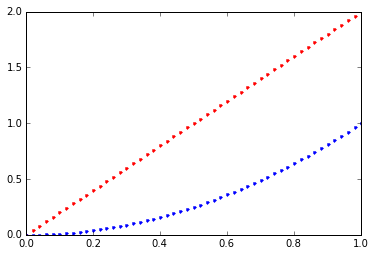

In [3]:

N = 500 #number of points
x = np.linspace(0, 10, N)
pdf = 2*x
cdf = x**2
plt.plot(x, pdf, 'r.')
plt.plot(x, cdf, 'b.')
plt.axis([0,1,0,2])

## PDF and CDF - More Complex
For a more complicated PDF function, I chose to use $Acos^2(x)$ and normalize it over the range from 0 to $\pi$.
$$\int_{0}^{\pi} Acos^2(x)dx = 1$$

$$\frac{A}{2}(x + sin(x)cos(x)) = 1$$

Evaluating from 0 to $\pi$:

$$A(\frac{\pi}{2}) = 1$$
$$A = \frac{2}{\pi}$$

This now makes the PDF function $\frac{2}{\pi}cos^2(x)$. The CDF is therefore
$$\frac{1}{\pi}(x + sin(x)cos(x))$$

[0, 3.141592653589793, 0, 1]

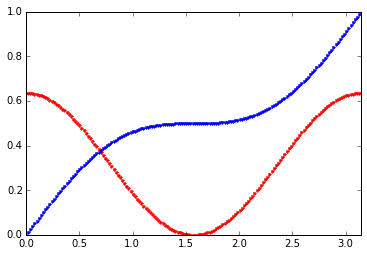

In [4]:
# more complex function
pdf = (2./np.pi)*np.cos(x)**2
cdf = (1./np.pi)*(x+np.sin(x)*np.cos(x))
#cdf = np.e**(-x**2)
plt.plot(x, pdf, 'r.')
plt.plot(x, cdf, 'b.')
plt.axis([0,np.pi,0,1])

## Rejection Sampling - Simple

For this section I used the simple one dimensional PDF that I found in the first section, $y = Ax$. I also chose to draw 1000 samples from this PDF, over the range x = 5 to x = 20. To normalize the function, I integrated:
$$\int_{5}^{20} Ax dx = 1$$
$$A(\frac{20^2}{2} - \frac{5^2}{2}) = 1$$
$$A(375) = 2$$
$$A = \frac{2}{375}$$

So the PDF function is $y = \frac{2}{375} x$ for this range.
The envelope function is also simple and set to y = 1, because for this range 1 is higher than the maximum PDF value, which occurs at $y = \frac{2}{375}(20) = \frac{40}{375}$.

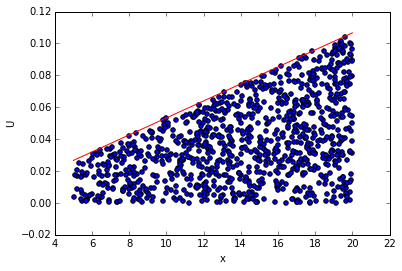

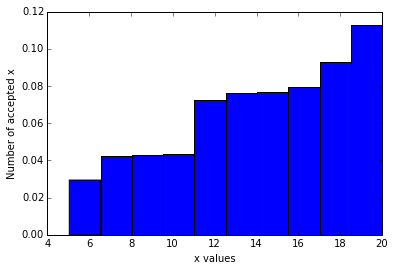

In [8]:
# rejection sampling method
#Simple function again
# pdf = 2x
# test from range 5-20
#need to normalize pdf over range from 5 to 20?


N = 1000 #number of samples to draw
total = 0 #initial number of samples drawn that fall in range
env = 1. #envelope function, needs to be above PDF in range you're looking at (at x=20, pdf = 40)
#currently a flat line above the values

Ulist = list()

while total < N: #while you don't have all the samples yet
    U = np.random.rand() #random number, map to range of y values (0, 50?)
    x = np.random.rand()*15 + 5 #random number mapped to range of x values (5, 20)
    pdf = (2./375.)*x
    
    
    if U < (pdf)/(env): # if condition is met, accept point
        total = total + 1 #add one to the count
        plt.figure(1)
        plt.scatter(x, U) #graph the point. why have to multiply by 50 again?
        #plt.axis([0, 25, 0, 50])
        Ulist.append(x)
    else:
        pass #otherwise do nothing
    
plt.figure(1)
x_exp = np.linspace(5, 20, 100)
exp_pdf = (2./375.)*x_exp #experimental pdf
plt.plot(x_exp, exp_pdf, 'r')
plt.xlabel("x")
plt.ylabel("U")

plt.figure(2)
plt.hist(Ulist, 10, normed = True)
plt.xlabel("x values")
plt.ylabel("Number of accepted x")




## Rejection Sampling - 2D

For the 2D sample, I chose to use the PDF $A(sin(x)+cos(y))$ over the range $0 < x < 4\pi$ and $0 < y < 4\pi$.
Normalizing this function over this range leads to
$$A\int_{0}^{4\pi} \int_{0}^{4\pi} sin(x)+cos(y) dx dy = 1$$
$$A\int_{0}^{4\pi} 4\pi sin(x) + sdfsdfd = 1 $$


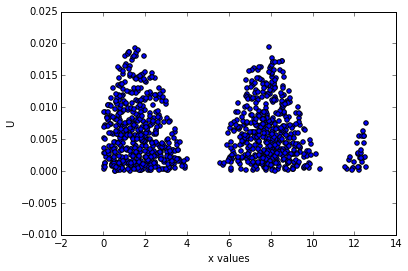

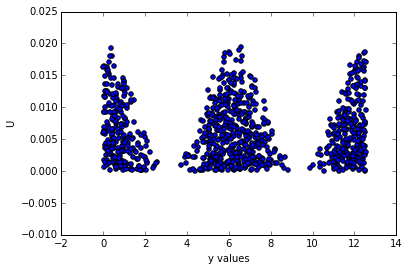

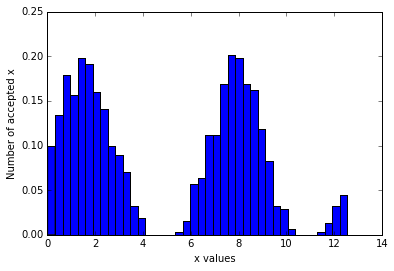

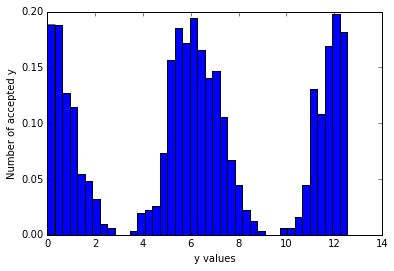

In [15]:
# more complicated rejection sampling function
# pdf = sin(x) + cos(y)
# range to look over 0 to 4pi

N = 1000 #number of samples to draw
total = 0
Xlist = list()
Ylist = list()

while total < N:
    U = np.random.rand() #random number between 0 and 1
    x = np.random.rand()*4*np.pi #random number mapped to range of x values
    y = np.random.rand()*4*np.pi #same as above line
    pdf = np.sin(x) + np.cos(y) #pdf function
    env = 100
        
    if U < (pdf)/(env): # if condition is met, accept point

        total = total + 1 #add one to the count
        plt.figure(1)
        plt.scatter(x, U) 
        plt.xlabel('x values')
        plt.ylabel('U')
        
        plt.figure(2)
        plt.scatter(y, U)
        plt.xlabel('y values')
        plt.ylabel('U')
        
        Xlist.append(x)
        Ylist.append(y)
    else:
        pass #otherwise do nothing

plt.figure(3)
plt.hist(Xlist, 40, normed = True)
plt.xlabel("x values")
plt.ylabel("Number of accepted x")

plt.figure(4)
plt.hist(Ylist, 40, normed = True)
plt.xlabel("y values")
plt.ylabel("Number of accepted y")





    
